# 1 Notebook Setup and Data Loading

Here, we'll import the necessary libraries and set up our file paths and plotting styles.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# --- Configuration ---
OUTPUT_DIR = Path("../output")
DATA_FILE = OUTPUT_DIR / "readmissions_dataset.parquet"

# --- Plotting Style ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

Load the Parquet file into a pandas DataFrame and display the first few rows to confirm it loaded correctly.

In [17]:
df = pd.read_parquet(DATA_FILE)

print(f"Dataset loaded with {df.shape[0]:,} rows and {df.shape[1]} columns.")
print("\nFirst 5 rows:")
display(df.head())

Dataset loaded with 104,068 rows and 14 columns.

First 5 rows:


,encounter_id,patient_id,readmitted_within_30_days,length_of_stay,age_at_admission,gender,race,marital_status,admission_reason,admission_reason_detail,prior_admissions_last_year,num_diagnoses,num_procedures,num_medications
0,f32b1a30-3f4a-2b23-831d-c45357e8d9f0,ff1ffc37-c7f1-c69e-db86-97e58dd06a38,0,2,36,female,White,M,Admission to surgical department (procedure),Sterilization requested (situation),0,1.0,0.0,0.0
1,0fc59893-26d9-4651-ee0d-3b91506cbeb9,ff1ffc37-c7f1-c69e-db86-97e58dd06a38,1,1,65,female,White,M,Patient transfer to intensive care unit (proce...,History of coronary artery bypass grafting (si...,0,0.0,5.0,0.0
2,65a91317-1fa0-cf87-27a1-7b2daccba883,ff1ffc37-c7f1-c69e-db86-97e58dd06a38,0,1,65,female,White,M,Admission to ward (procedure),History of coronary artery bypass grafting (si...,1,0.0,4.0,0.0
3,e2477992-082b-69ca-3152-6fecf4442626,45ccdf82-db5c-3947-2d97-ee18a8a9c4e3,0,12,53,female,White,W,Hospital admission for isolation (procedure),Disease caused by severe acute respiratory syn...,0,4.0,27.0,0.0
4,735f3287-d205-1ec8-9668-fcdac03f306a,a5a065d0-a35b-d8e3-fda6-0e92c0a40926,0,1,63,female,White,M,Admission to intensive care unit (procedure),Chronic congestive heart failure (disorder),0,0.0,5.0,0.0


Use .info() to get a concise summary of the DataFrame, including data types and non-null counts.

In [18]:
print("\nData Types and Null Values:")
df.info()


Data Types and Null Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104068 entries, 0 to 104067
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   encounter_id                104068 non-null  object 
 1   patient_id                  104068 non-null  object 
 2   readmitted_within_30_days   104068 non-null  int32  
 3   length_of_stay              104068 non-null  int64  
 4   age_at_admission            104068 non-null  int64  
 5   gender                      104068 non-null  object 
 6   race                        104068 non-null  object 
 7   marital_status              104068 non-null  object 
 8   admission_reason            104068 non-null  object 
 9   admission_reason_detail     104063 non-null  object 
 10  prior_admissions_last_year  104068 non-null  int64  
 11  num_diagnoses               104068 non-null  float64
 12  num_procedures              104068 non-null

Use .describe() to generate descriptive statistics for the numeric columns.

In [19]:
print("\nStatistical Summary of Numeric Features:")
display(df.describe())


Statistical Summary of Numeric Features:


,readmitted_within_30_days,length_of_stay,age_at_admission,prior_admissions_last_year,num_diagnoses,num_procedures,num_medications
count,104068.000000,104068.000000,104068.000000,104068.000000,104068.000000,104068.000000,104068.000000
mean,0.178095,6.917170,50.162759,2.039032,0.377984,9.333936,0.183995
std,0.382595,14.102942,19.497225,3.557021,0.719728,15.938124,0.818711
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.000000,52.000000,0.000000,0.000000,4.000000,0.000000
75%,0.000000,8.000000,65.000000,2.000000,1.000000,12.000000,0.000000
max,1.000000,3306.000000,111.000000,14.000000,8.000000,176.000000,9.000000


# 2 Target Variable Analysis

First, let's look at the distribution of our target variable, `readmitted_within_30_days`. This is a binary classification problem, so we need to check for **class imbalance**.

Target Variable Distribution:
readmitted_within_30_days
0    82.190491
1    17.809509
Name: proportion, dtype: float64


/tmp/ipykernel_19/1076831302.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Not Readmitted', 'Readmitted'])


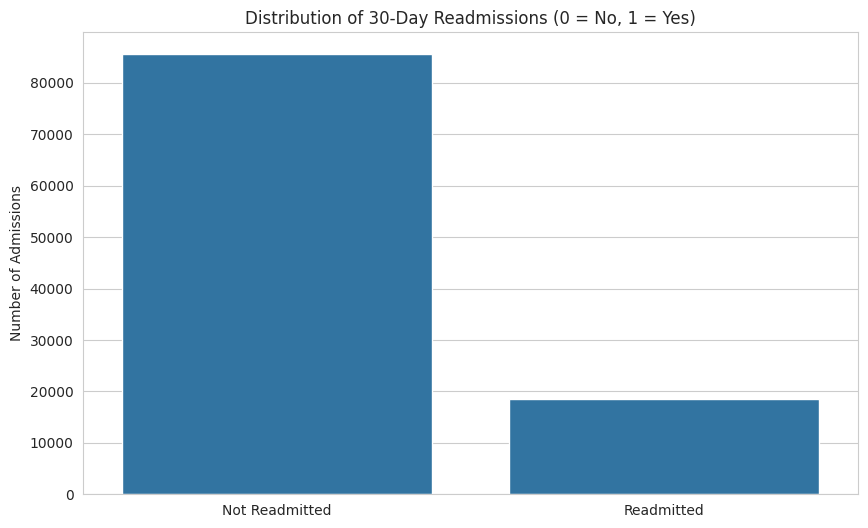

In [20]:
target_counts = df['readmitted_within_30_days'].value_counts(normalize=True) * 100
print("Target Variable Distribution:")
print(target_counts)

sns.countplot(x='readmitted_within_30_days', data=df)
plt.title('Distribution of 30-Day Readmissions (0 = No, 1 = Yes)')
plt.gca().set_xticklabels(['Not Readmitted', 'Readmitted'])
plt.ylabel('Number of Admissions')
plt.xlabel('')
plt.show()

# 3 Univariate Analysis (Exploring Single Features)

Here, we'll look at the distributions of individual features to understand their characteristics.

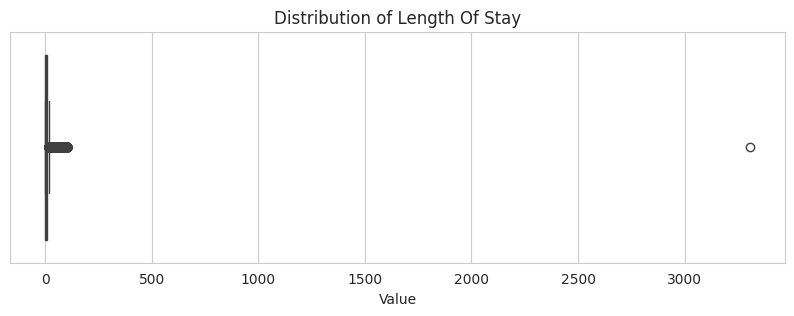

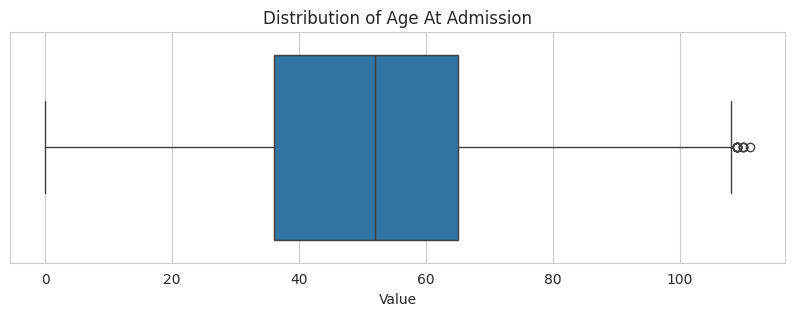

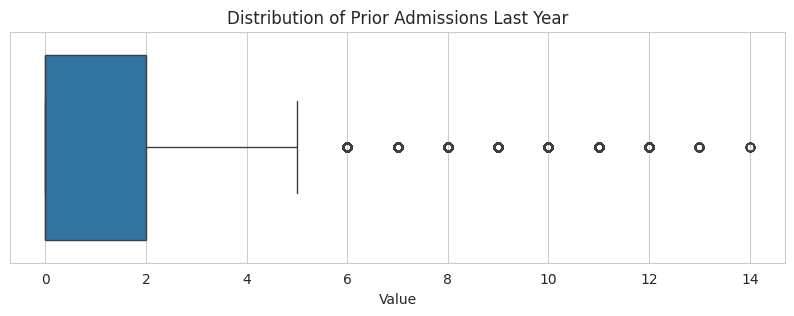

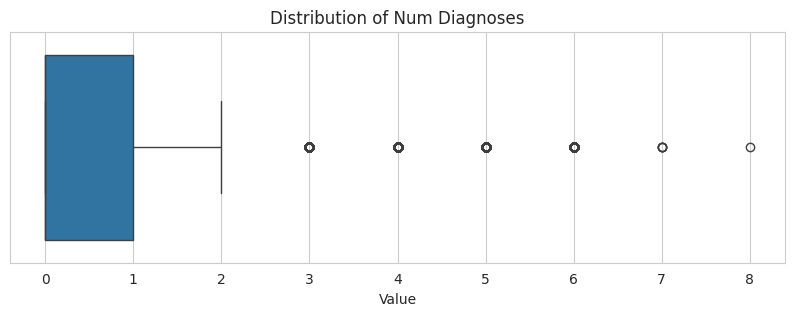

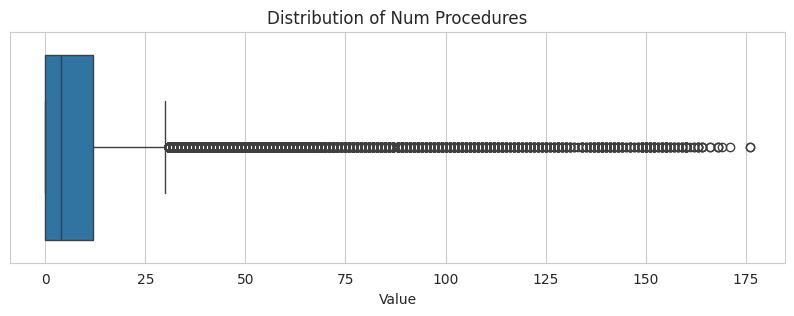

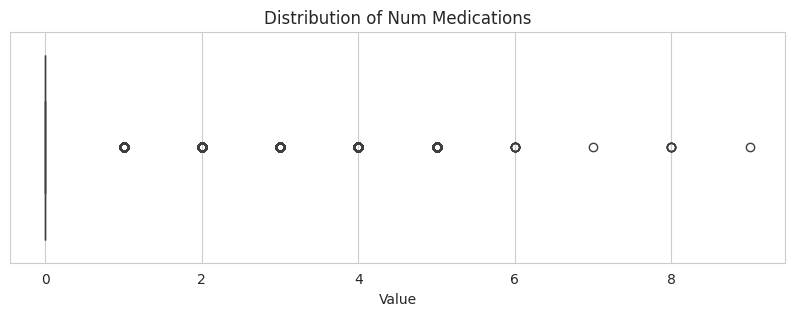

In [21]:
# List of numeric features to plot
numeric_features = ['length_of_stay', 'age_at_admission', 'prior_admissions_last_year', 'num_diagnoses', 'num_procedures', 'num_medications']

# Loop through each feature and create an individual boxplot
for col in numeric_features:
    plt.figure(figsize=(10, 3))  # Create a new figure for each plot
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel('Value')
    plt.show()

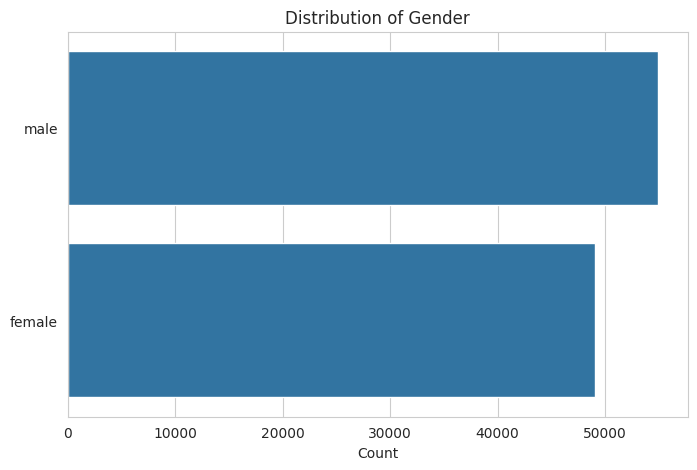

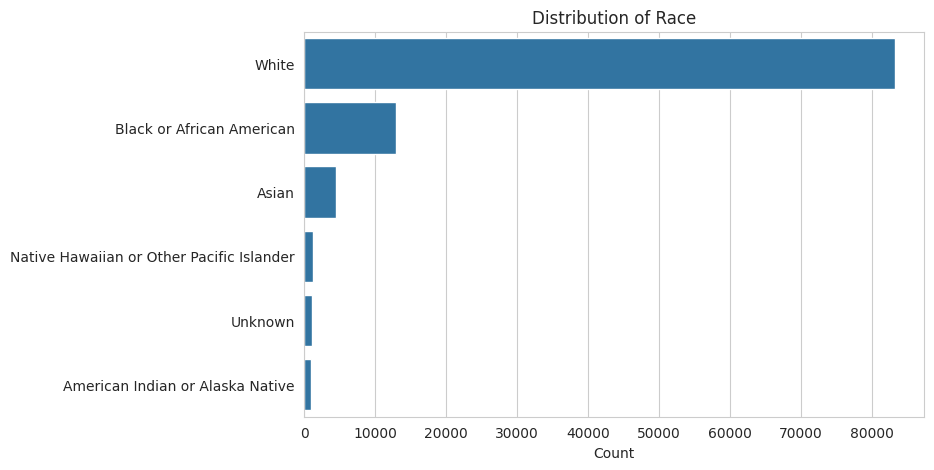

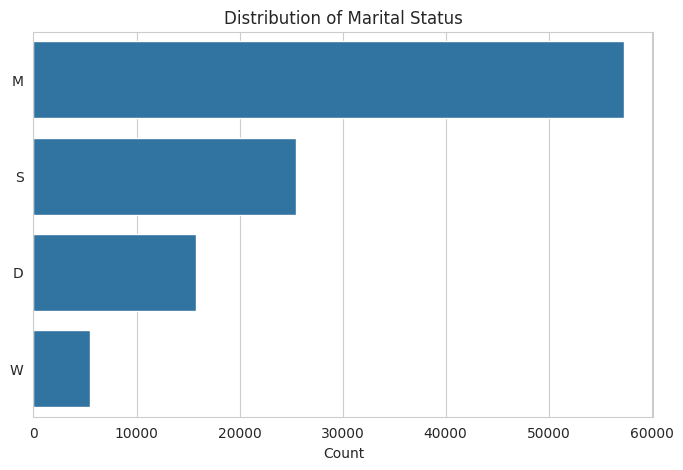

In [22]:
# --- Categorical Features ---
categorical_features = ['gender', 'race', 'marital_status']

for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel('Count')
    plt.ylabel('')
    plt.show()

# 4 Bivariate Analysis (Features vs. Target)

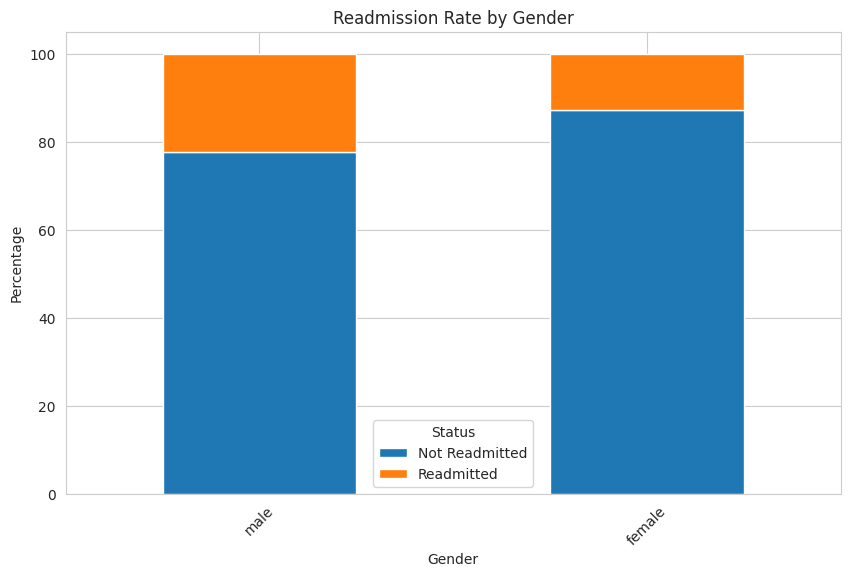

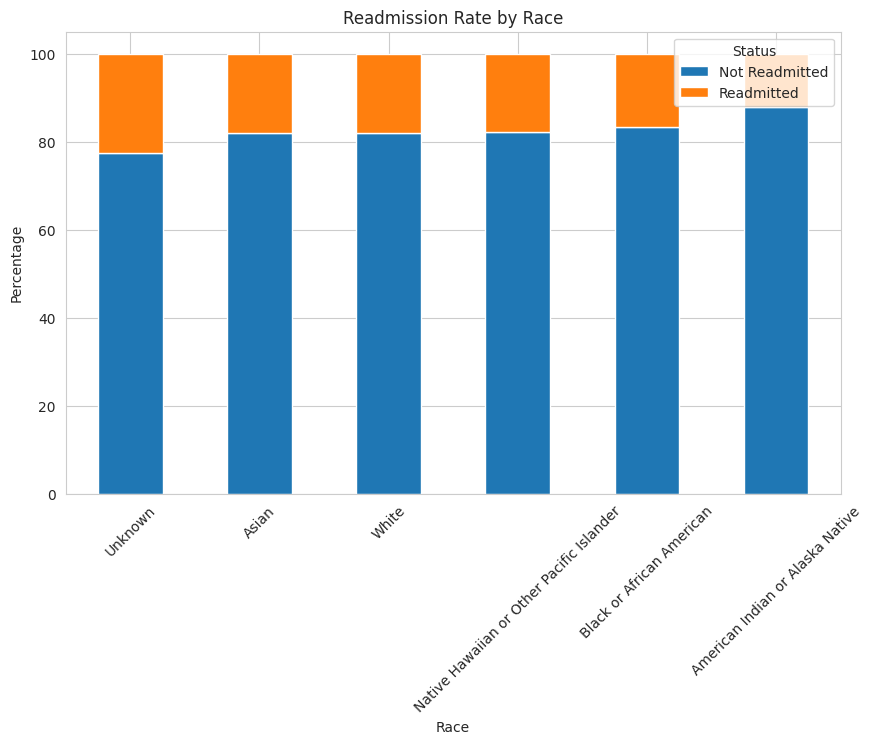

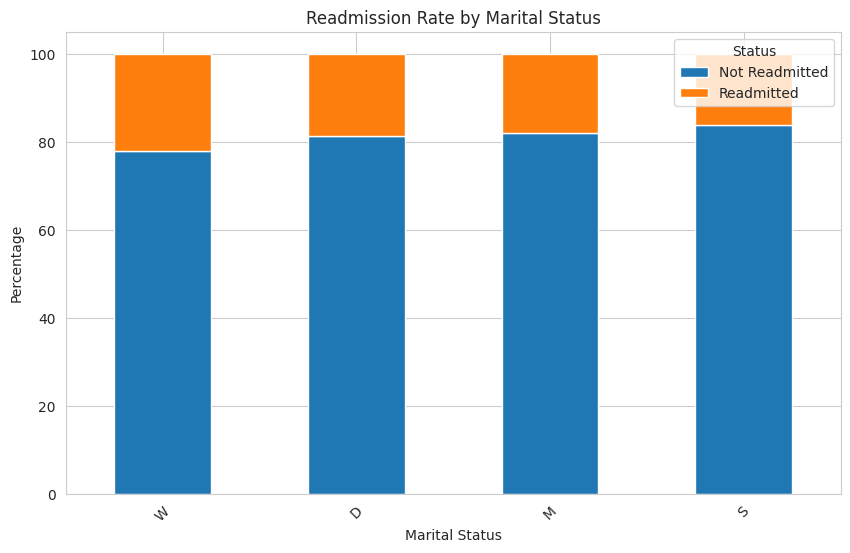

In [23]:
# --- Categorical Features vs. Target ---
for col in categorical_features:
    rate_df = df.groupby(col)['readmitted_within_30_days'].value_counts(normalize=True).unstack() * 100
    rate_df = rate_df.sort_values(by=1, ascending=False)
    
    rate_df.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Readmission Rate by {col.replace("_", " ").title()}')
    plt.ylabel('Percentage')
    plt.xlabel(col.replace("_", " ").title())
    plt.xticks(rotation=45)
    plt.legend(['Not Readmitted', 'Readmitted'], title='Status')
    plt.show()

# 5 Correlation and Final Steps

Finally, we'll check for correlations between numeric features and summarize our next steps before modeling.

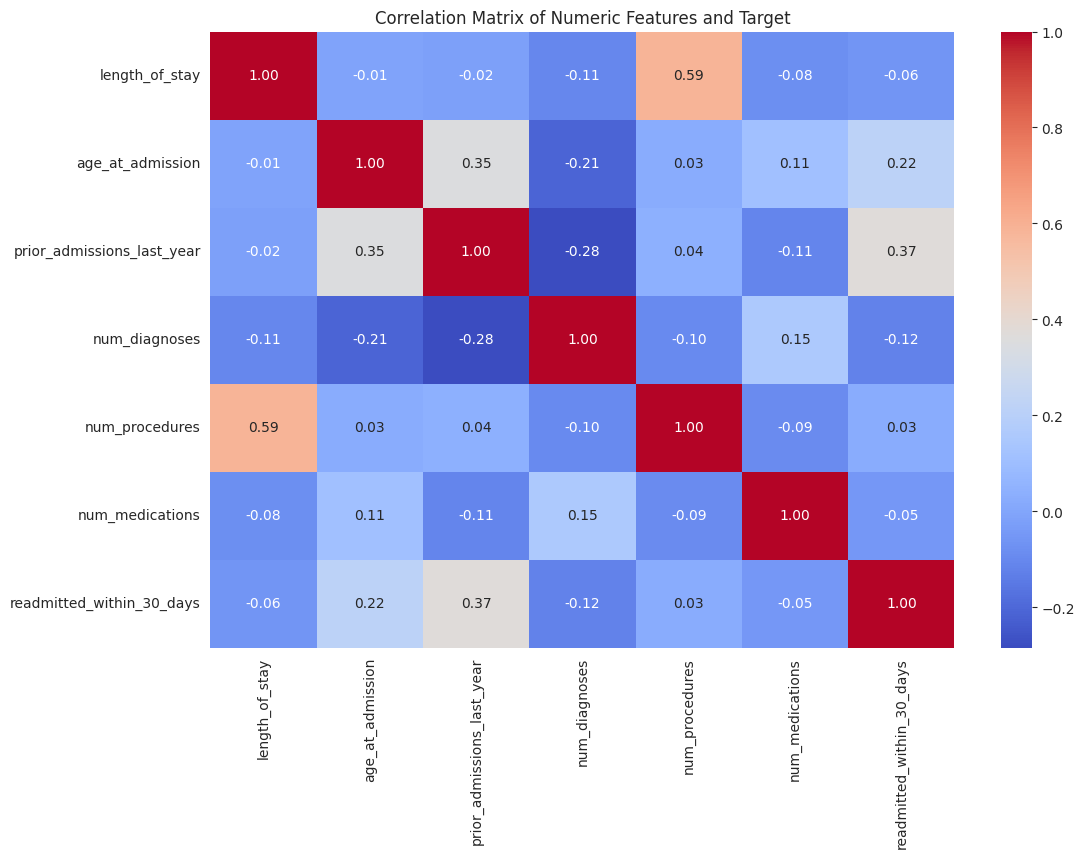

In [24]:
# --- Correlation Analysis ---
plt.figure(figsize=(12, 8))
corr = df[numeric_features + ['readmitted_within_30_days']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features and Target')
plt.show()